In [24]:
# import all the required libraries
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import TweetTokenizer
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nrclex import NRCLex
import itertools
import collections
# nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
# load the tweets csv file
tweets_df = pd.read_csv('_us_elections2020.csv')

In [3]:
# information about the dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215231 entries, 0 to 215230
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            215231 non-null  object 
 1   id                    215231 non-null  int64  
 2   full_text             215231 non-null  object 
 3   source                215230 non-null  object 
 4   user.id               215231 non-null  int64  
 5   user.name             215224 non-null  object 
 6   user.location         150903 non-null  object 
 7   user.followers_count  215231 non-null  int64  
 8   user.lang             0 non-null       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 14.8+ MB


In [4]:
tweets_df = tweets_df.drop(['user.lang'],1)

In [5]:
# drop tweets that have the source column empty
tweets_df = tweets_df.dropna(subset = ['source'])

In [6]:
# get the source of the tweets
tweets_df['tweet_source'] = tweets_df['source'].apply(lambda x: BeautifulSoup(x).get_text())

In [7]:
tweets_df = tweets_df.drop(['source'],1)

In [8]:
# get all the tweets whose source starts with Twitter
# most of the tweets that are tweeted by humans have sources starting from twitter
x = tweets_df[tweets_df.tweet_source.str.startswith('Twitter') ==True]

In [9]:
# check the distribution of tweets amoung sources
y = pd.DataFrame(x.tweet_source.value_counts())
y

,tweet_source
Twitter for iPhone,62837
Twitter Web App,52192
Twitter for Android,38133
Twitter Web Client,25731
Twitter for iPad,11527
Twitter Media Studio,135
Twitter for Mac,107
Twitter for Advertisers,105
Twitterrific for iOS,91
Twitterrific for Mac,19


In [10]:
# we can see that the top 7 columns are human tweet sources
z = y.head(7)
devices = list(z.index)
devices

['Twitter for iPhone',
 'Twitter Web App',
 'Twitter for Android',
 'Twitter Web Client',
 'Twitter for iPad',
 'Twitter Media Studio',
 'Twitter for Mac']

In [11]:
# only keep tweets that are made by humans
tweets_df = tweets_df[tweets_df['tweet_source'].isin(devices)]
tweets_df.shape

(190662, 8)

In [12]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [13]:
def mention_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"@(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [14]:
tweets_df['hashtags'] = hashtag_extract(tweets_df.full_text)

In [15]:
tweets_df['mention'] = mention_extract(tweets_df.full_text)

In [16]:
tweets_df.head()

,created_at,id,full_text,user.id,user.name,user.location,user.followers_count,tweet_source,hashtags,mention
0,Tue May 26 18:38:44 +0000 2020,1265351681505660929,So Cyril's role model is D.Trump or Colonizati...,1009903269437739017,Lungisani S. Ndaba,NaN,112,Twitter Web App,[ChurchIsEssential],[]
1,Tue May 26 18:38:44 +0000 2020,1265351680796684288,im gonna stop spamming trump before i get depo...,1112501402729746433,choccy dildo | 1312,whoville • she/her,948,Twitter Web App,[],[]
2,Tue May 26 18:38:43 +0000 2020,1265351678192226304,Klobuchar Bashes Trump over His Use of Hydroxy...,31053294,Margaret H,Kansas,6366,Twitter Web Client,[],[gatewaypundit]
3,Tue May 26 18:38:43 +0000 2020,1265351677995036673,Biden loves Netanyahu (Jonathan Ofir)\n https:...,163453309,Javier Villate,Euskadi,1501,Twitter Web Client,[],[]
4,Tue May 26 18:38:43 +0000 2020,1265351676719964161,Klobuchar Bashes Trump over His Use of Hydroxy...,705890784319377409,DLW,"Texas, USA",10543,Twitter for iPad,[],[]


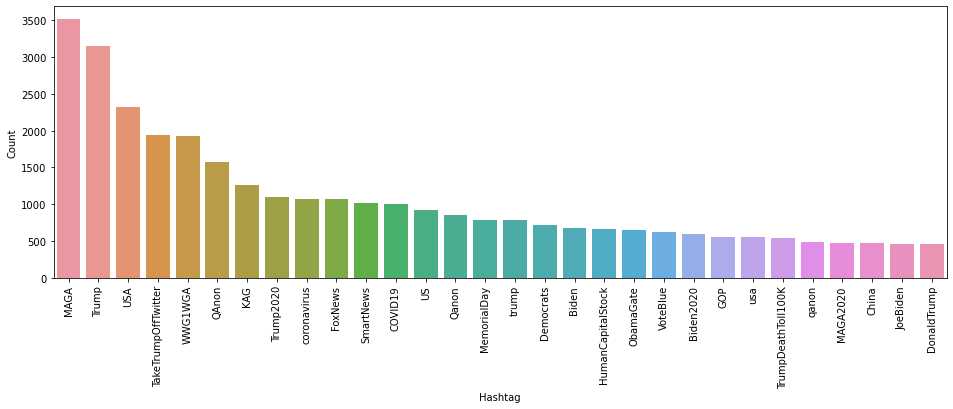

In [123]:
Hashtags = sum(tweets_df['hashtags'],[])
a = nltk.FreqDist(Hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

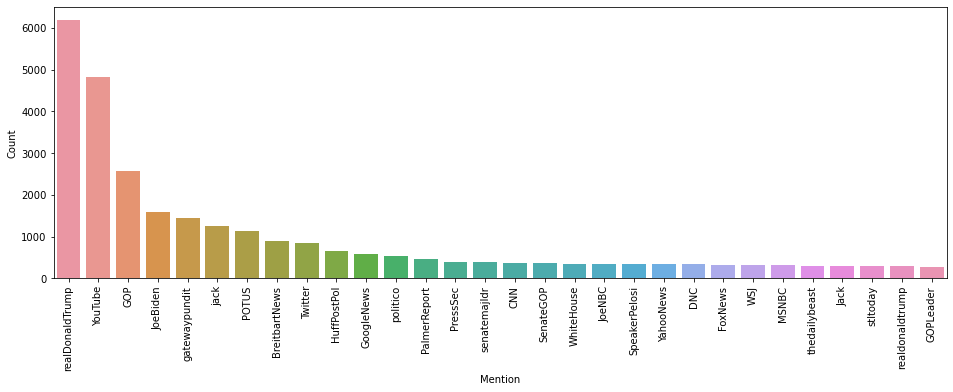

In [124]:
mentions = sum(tweets_df['mention'],[])
a = nltk.FreqDist(mentions)
d = pd.DataFrame({'Mention': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent mentions     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Mention", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
# to process data for sentiment analysis first preprocessing is required
# tokenize the tweets
tweets_df['tokens']=tweets_df['full_text'].apply(TweetTokenizer().tokenize)

In [17]:
# remove the words like 'is','of','are', etc. that are not useful
stopwords_vocabulary = stopwords.words('english')
tweets_df['stopwords'] = tweets_df['tokens'].apply(lambda x:[i for i in x if i.lower() not in stopwords_vocabulary])

In [18]:
# remove punctuation
punctuations = list(string.punctuation)
tweets_df['punctuation'] = tweets_df['stopwords'].apply(lambda x: [i for i in x if i[0] not in punctuations])
tweets_df['digits'] = tweets_df['punctuation'].apply(lambda x: [i for i in x if i[0] not in list(string.digits)])
tweets_df['final'] = tweets_df['digits'].apply(lambda x: [i for i in x if len(i)>1])

In [19]:
tweets_df['final_new'] = tweets_df.final.apply(lambda x: ' '.join(x)) 

In [20]:
tweets_df['final_new'] = tweets_df['final_new'].str.replace('http.*','')
tweets_df['final_new'] = tweets_df['final_new'].str.replace('bit.ly.*','')

In [69]:
tweets_df['final_new'].head()

0    Cyril's role model D.Trump Colonization occurred 
1            im gonna stop spamming trump get deported
2    Klobuchar Bashes Trump Use Hydroxychloroquine ...
3                 Biden loves Netanyahu Jonathan Ofir 
4    Klobuchar Bashes Trump Use Hydroxychloroquine ...
Name: final_new, dtype: object

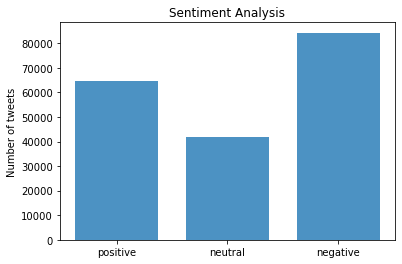

In [70]:
# define the function
sentiment = SentimentIntensityAnalyzer()
# get the compound scores using the analyser
tweets_df['sentiment'] = tweets_df.final_new.apply(lambda x: sentiment.polarity_scores(x)['compound'])

# define positive, negative and neutral score to plot data
pos = len(tweets_df[tweets_df.sentiment > 0])
neg = len(tweets_df[tweets_df.sentiment < 0])
neu = len(tweets_df[tweets_df.sentiment == 0])

# plot a bar graph to show the distribution
y = [pos, neu, neg]
plt.title('Sentiment Analysis')
plt.ylabel('Number of tweets')
plt.xticks(range(len(y)),['positive','neutral','negative'])
plt.bar(range(len(y)),height = y,width = 0.75, align = 'center',alpha = 0.8 )
plt.show()

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tweets_df['final_new']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-135-2e77378c9184>:4: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


In [133]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 50

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [73]:
model.fit(tf)

LatentDirichletAllocation(n_components=50, random_state=0)

In [74]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    pd.DataFrame(topic_dict).to_csv('topic_modelling.csv',  header=True)
    return pd.DataFrame(topic_dict)

In [75]:
no_top_words = 20
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 45 words,Topic 45 weights,Topic 46 words,Topic 46 weights,Topic 47 words,Topic 47 weights,Topic 48 words,Topic 48 weights,Topic 49 words,Topic 49 weights
0,biden,19877.5,trump,3555.1,news,2467.0,party,3350.1,love,1856.3,...,american,3926.6,trump,2261.8,deaths,1931.8,administration,2121.0,democrat,4518.6
1,joe,10589.4,great,2506.0,trump,2027.6,vote,2315.8,trump,1765.0,...,trump,2349.0,fox,1216.2,voter,1480.4,trump,2039.8,vote,1617.8
2,black,2823.1,job,1331.5,fake,1572.7,elections,1763.5,hate,1745.6,...,fraud,1262.8,wants,1112.7,trump,1074.5,obama,1306.9,year,1435.0
3,vote,1946.5,make,1188.2,lives,1280.0,gop,1585.9,governors,1129.8,...,day,1211.8,news,1026.8,fraud,1055.5,looking,1072.3,democrats,1408.9
4,beat,925.9,red,950.0,women,988.4,office,1531.6,election,832.6,...,memorial,1096.8,follow,1008.6,cases,729.7,general,1030.8,want,1244.8
5,president,881.5,family,942.5,leaders,909.2,trump,1431.9,churches,594.7,...,veteran,902.2,talking,815.6,covid,654.9,record,1004.0,need,917.0
6,democrat,683.0,done,820.9,ad,728.9,support,1398.5,democrat,504.9,...,calls,874.6,full,651.4,total,575.6,health,877.9,people,834.9
7,going,656.0,america,675.9,save,660.3,power,1350.8,simple,475.6,...,marine,863.0,convention,567.4,evidence,565.7,'s,785.0,would,770.9
8,racist,604.8,set,665.6,president,574.1,republican,1267.8,loses,445.2,...,congressman,712.9,cdc,525.8,zero,478.4,firing,503.0,never,720.2
9,policy,603.5,attack,476.6,breaking,528.7,order,758.7,open,434.5,...,showing,677.0,watch,518.4,homes,448.0,michigan,501.8,america,600.8


In [141]:
from gensim import corpora, models
text_list = list(tweets_df.final)

dictionary_LDA = corpora.Dictionary(text_list)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in text_list]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

C:\Users\Priyanka\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


Wall time: 6min 31s


In [142]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [76]:
tweets_df.head()

,created_at,id,full_text,user.id,user.name,user.location,user.followers_count,tweet_source,hashtags,mention,tokens,stopwords,punctuation,digits,final,final_new,sentiment
0,Tue May 26 18:38:44 +0000 2020,1265351681505660929,So Cyril's role model is D.Trump or Colonizati...,1009903269437739017,Lungisani S. Ndaba,NaN,112,Twitter Web App,[ChurchIsEssential],[],"[So, Cyril's, role, model, is, D.Trump, or, Co...","[Cyril's, role, model, D.Trump, Colonization, ...","[Cyril's, role, model, D.Trump, Colonization, ...","[Cyril's, role, model, D.Trump, Colonization, ...","[Cyril's, role, model, D.Trump, Colonization, ...",Cyril's role model D.Trump Colonization occurred,0.0000
1,Tue May 26 18:38:44 +0000 2020,1265351680796684288,im gonna stop spamming trump before i get depo...,1112501402729746433,choccy dildo | 1312,whoville • she/her,948,Twitter Web App,[],[],"[im, gonna, stop, spamming, trump, before, i, ...","[im, gonna, stop, spamming, trump, get, deported]","[im, gonna, stop, spamming, trump, get, deported]","[im, gonna, stop, spamming, trump, get, deported]","[im, gonna, stop, spamming, trump, get, deported]",im gonna stop spamming trump get deported,-0.6486
2,Tue May 26 18:38:43 +0000 2020,1265351678192226304,Klobuchar Bashes Trump over His Use of Hydroxy...,31053294,Margaret H,Kansas,6366,Twitter Web Client,[],[gatewaypundit],"[Klobuchar, Bashes, Trump, over, His, Use, of,...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...",Klobuchar Bashes Trump Use Hydroxychloroquine ...,0.4215
3,Tue May 26 18:38:43 +0000 2020,1265351677995036673,Biden loves Netanyahu (Jonathan Ofir)\n https:...,163453309,Javier Villate,Euskadi,1501,Twitter Web Client,[],[],"[Biden, loves, Netanyahu, (, Jonathan, Ofir, )...","[Biden, loves, Netanyahu, (, Jonathan, Ofir, )...","[Biden, loves, Netanyahu, Jonathan, Ofir, http...","[Biden, loves, Netanyahu, Jonathan, Ofir, http...","[Biden, loves, Netanyahu, Jonathan, Ofir, http...",Biden loves Netanyahu Jonathan Ofir,0.5719
4,Tue May 26 18:38:43 +0000 2020,1265351676719964161,Klobuchar Bashes Trump over His Use of Hydroxy...,705890784319377409,DLW,"Texas, USA",10543,Twitter for iPad,[],[],"[Klobuchar, Bashes, Trump, over, His, Use, of,...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...","[Klobuchar, Bashes, Trump, Use, Hydroxychloroq...",Klobuchar Bashes Trump Use Hydroxychloroquine ...,0.4215


In [37]:
tweets_df["final_new"] = tweets_df["final_new"].str.lower()

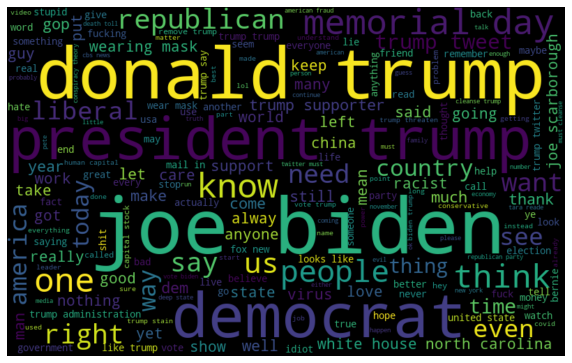

In [78]:
all_words = ' '.join([text for text in tweets_df['final_new']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

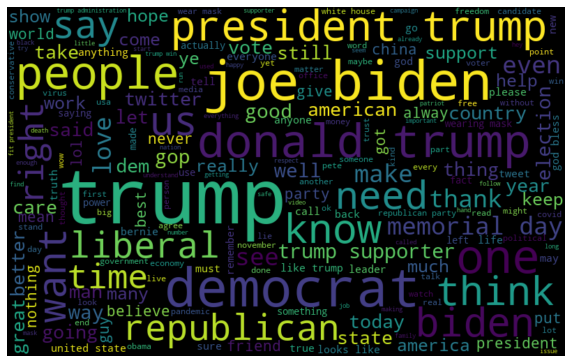

In [79]:
normal_words =' '.join([text for text in tweets_df['final_new'][tweets_df['sentiment'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

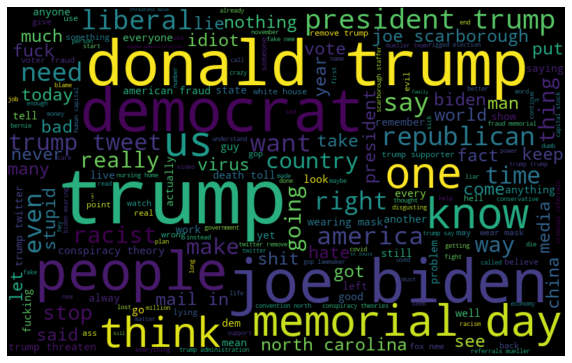

In [80]:
normal_words =' '.join([text for text in tweets_df['final_new'][tweets_df['sentiment'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

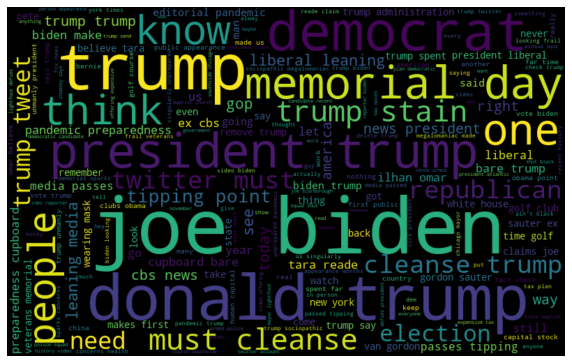

In [81]:
normal_words =' '.join([text for text in tweets_df['final_new'][tweets_df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

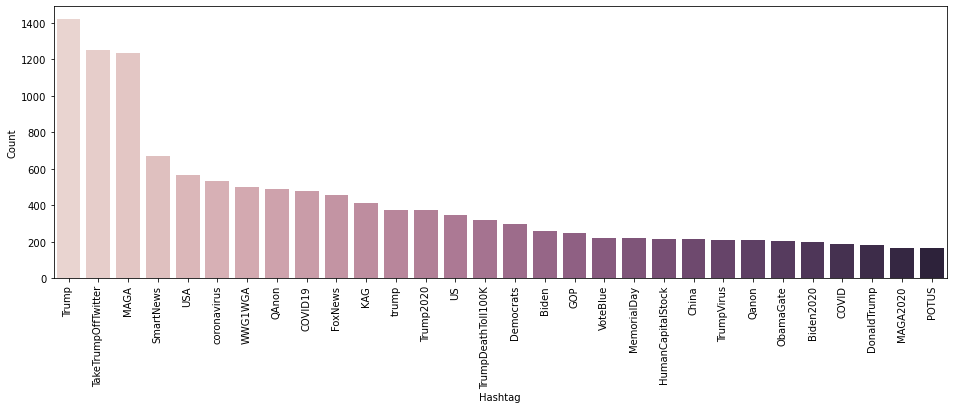

In [106]:
Hashtags_neg = sum(tweets_df['hashtags'][tweets_df['sentiment']<0],[])
a = nltk.FreqDist(Hashtags_neg)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette = 'ch:.25')
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

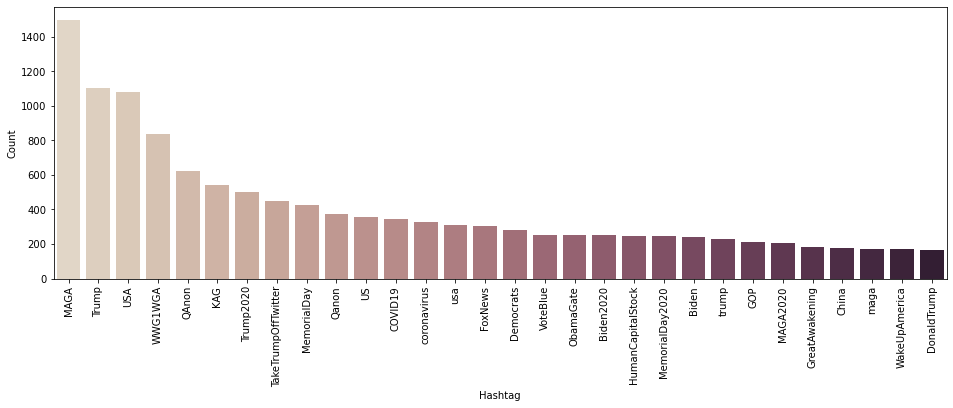

In [104]:
Hashtags_pos = sum(tweets_df['hashtags'][tweets_df['sentiment']>0],[])
a = nltk.FreqDist(Hashtags_pos)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette = 'ch:.25')
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

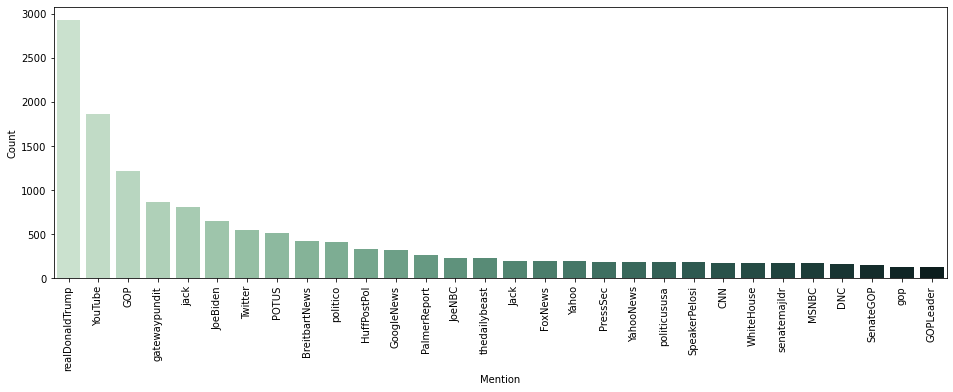

In [120]:
mention_neg = sum(tweets_df['mention'][tweets_df['sentiment']<0],[])
a = nltk.FreqDist(mention_neg)
d = pd.DataFrame({'Mention': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent mentions     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Mention", y = "Count", palette = 'ch:2.5,-.2,dark=0.1')
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

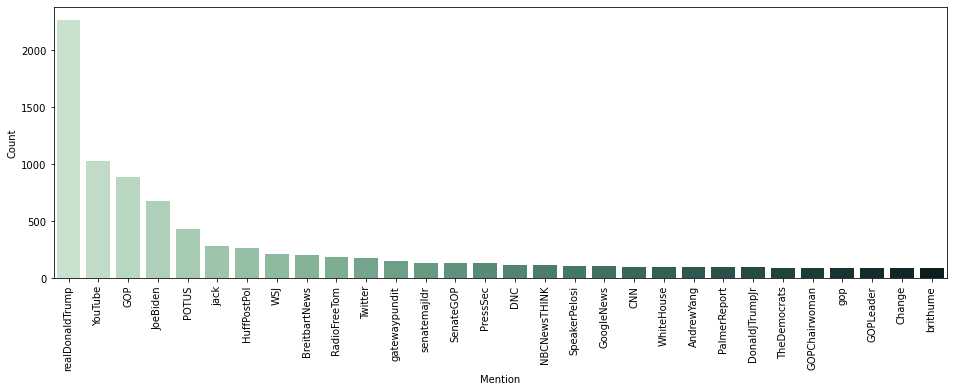

In [117]:
mention_pos = sum(tweets_df['mention'][tweets_df['sentiment']>0],[])
a = nltk.FreqDist(mention_pos)
d = pd.DataFrame({'Mention': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 30 most frequent mentions    
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Mention", y = "Count", palette = "ch:2.5,-.2,dark=0.1")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

In [66]:
trump = tweets_df[tweets_df['final_new'].str.contains('trump') == True].reset_index()

In [67]:
biden = tweets_df[tweets_df['final_new'].str.contains('biden') == True].reset_index()

In [68]:
trump['text_object'] = trump['final_new'].apply(lambda x: NRCLex(x).affect_frequencies )

In [69]:
biden['text_object'] = biden['final_new'].apply(lambda x: NRCLex(x).affect_frequencies )

In [90]:
trump_emotions = trump.text_object.apply(pd.Series)

In [91]:
biden_emotions = biden.text_object.apply(pd.Series)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

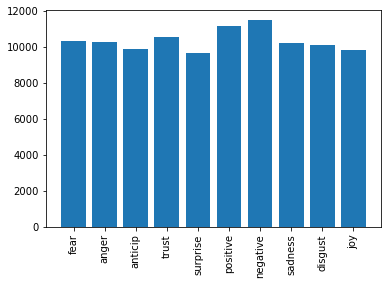

In [104]:
x = pd.DataFrame(trump_emotions.sum())
plt.bar(x.index, x[0])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

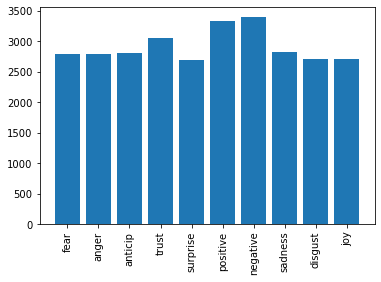

In [106]:
y = pd.DataFrame(biden_emotions.sum())
plt.bar(y.index, y[0])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

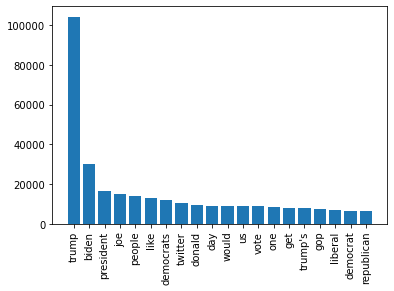

In [126]:
words_in_tweet = [tweet.lower().split() for tweet in tweets_df['final_new']]
all_words = list(itertools.chain(*words_in_tweet))
counts = collections.Counter(all_words)
count_df = pd.DataFrame(counts.most_common(20))
plt.bar(count_df[0],count_df[1])
plt.xticks(rotation=90)